<a href="https://colab.research.google.com/github/ThomasEKolb/AK-Tag/blob/main/AK-Tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

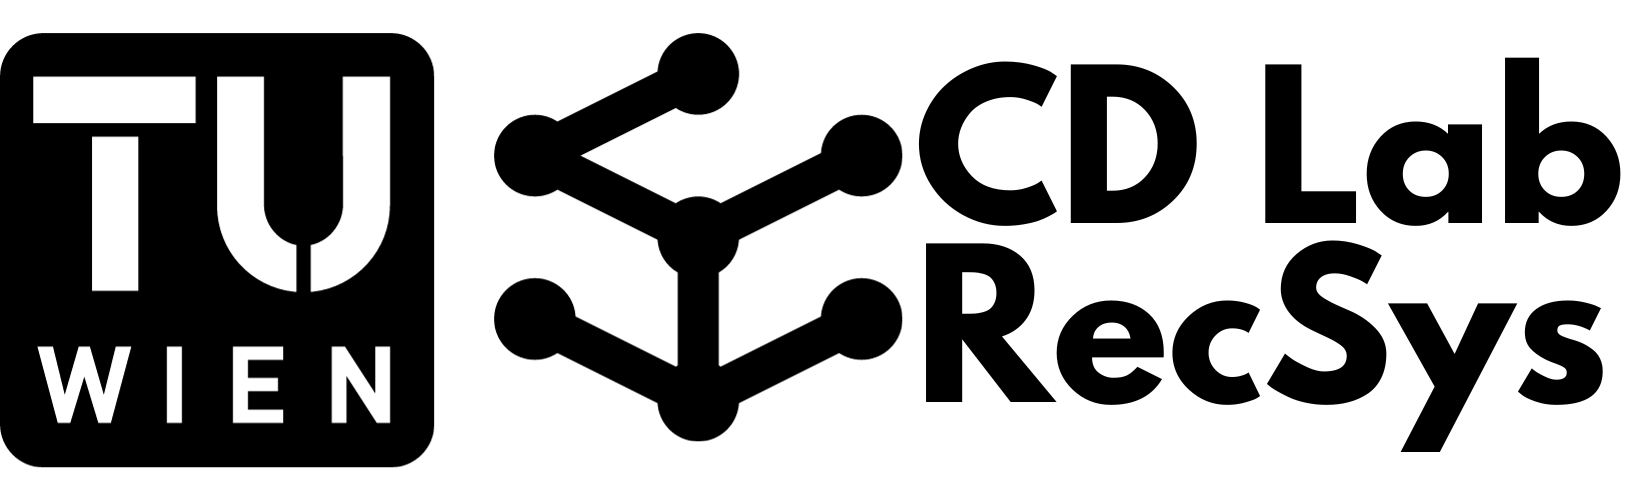

# **AK-Tag - Hands-on Session  (15.05.2024 - 12:45-13:30)**
## **Link zum Showcase**
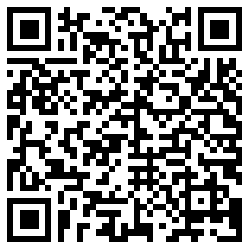

Link zum repository: https://github.com/ThomasEKolb/AK-Tag

## **Über Uns**
*   DI Thomas E. Kolb

  [thomas.kolb@tuwien.ac.at](thomas.kolb@tuwien.ac.at)

  [https://recsys-lab.at/team/thomas-kolb/](https://recsys-lab.at/team/thomas-kolb/)

*   DI Ahmadou Wagne

  [ahmadou.wagne@tuwien.ac.at](ahmadou.wagne@tuwien.ac.at)

  [https://recsys-lab.at/team/ahmadou-wagne/](https://recsys-lab.at/team/ahmadou-wagne/)

PreDoc Researcher & PhD Student an der TU Wien im CD Labor-RecSys.

---

## **Einführung**

### Was sind LLMs?
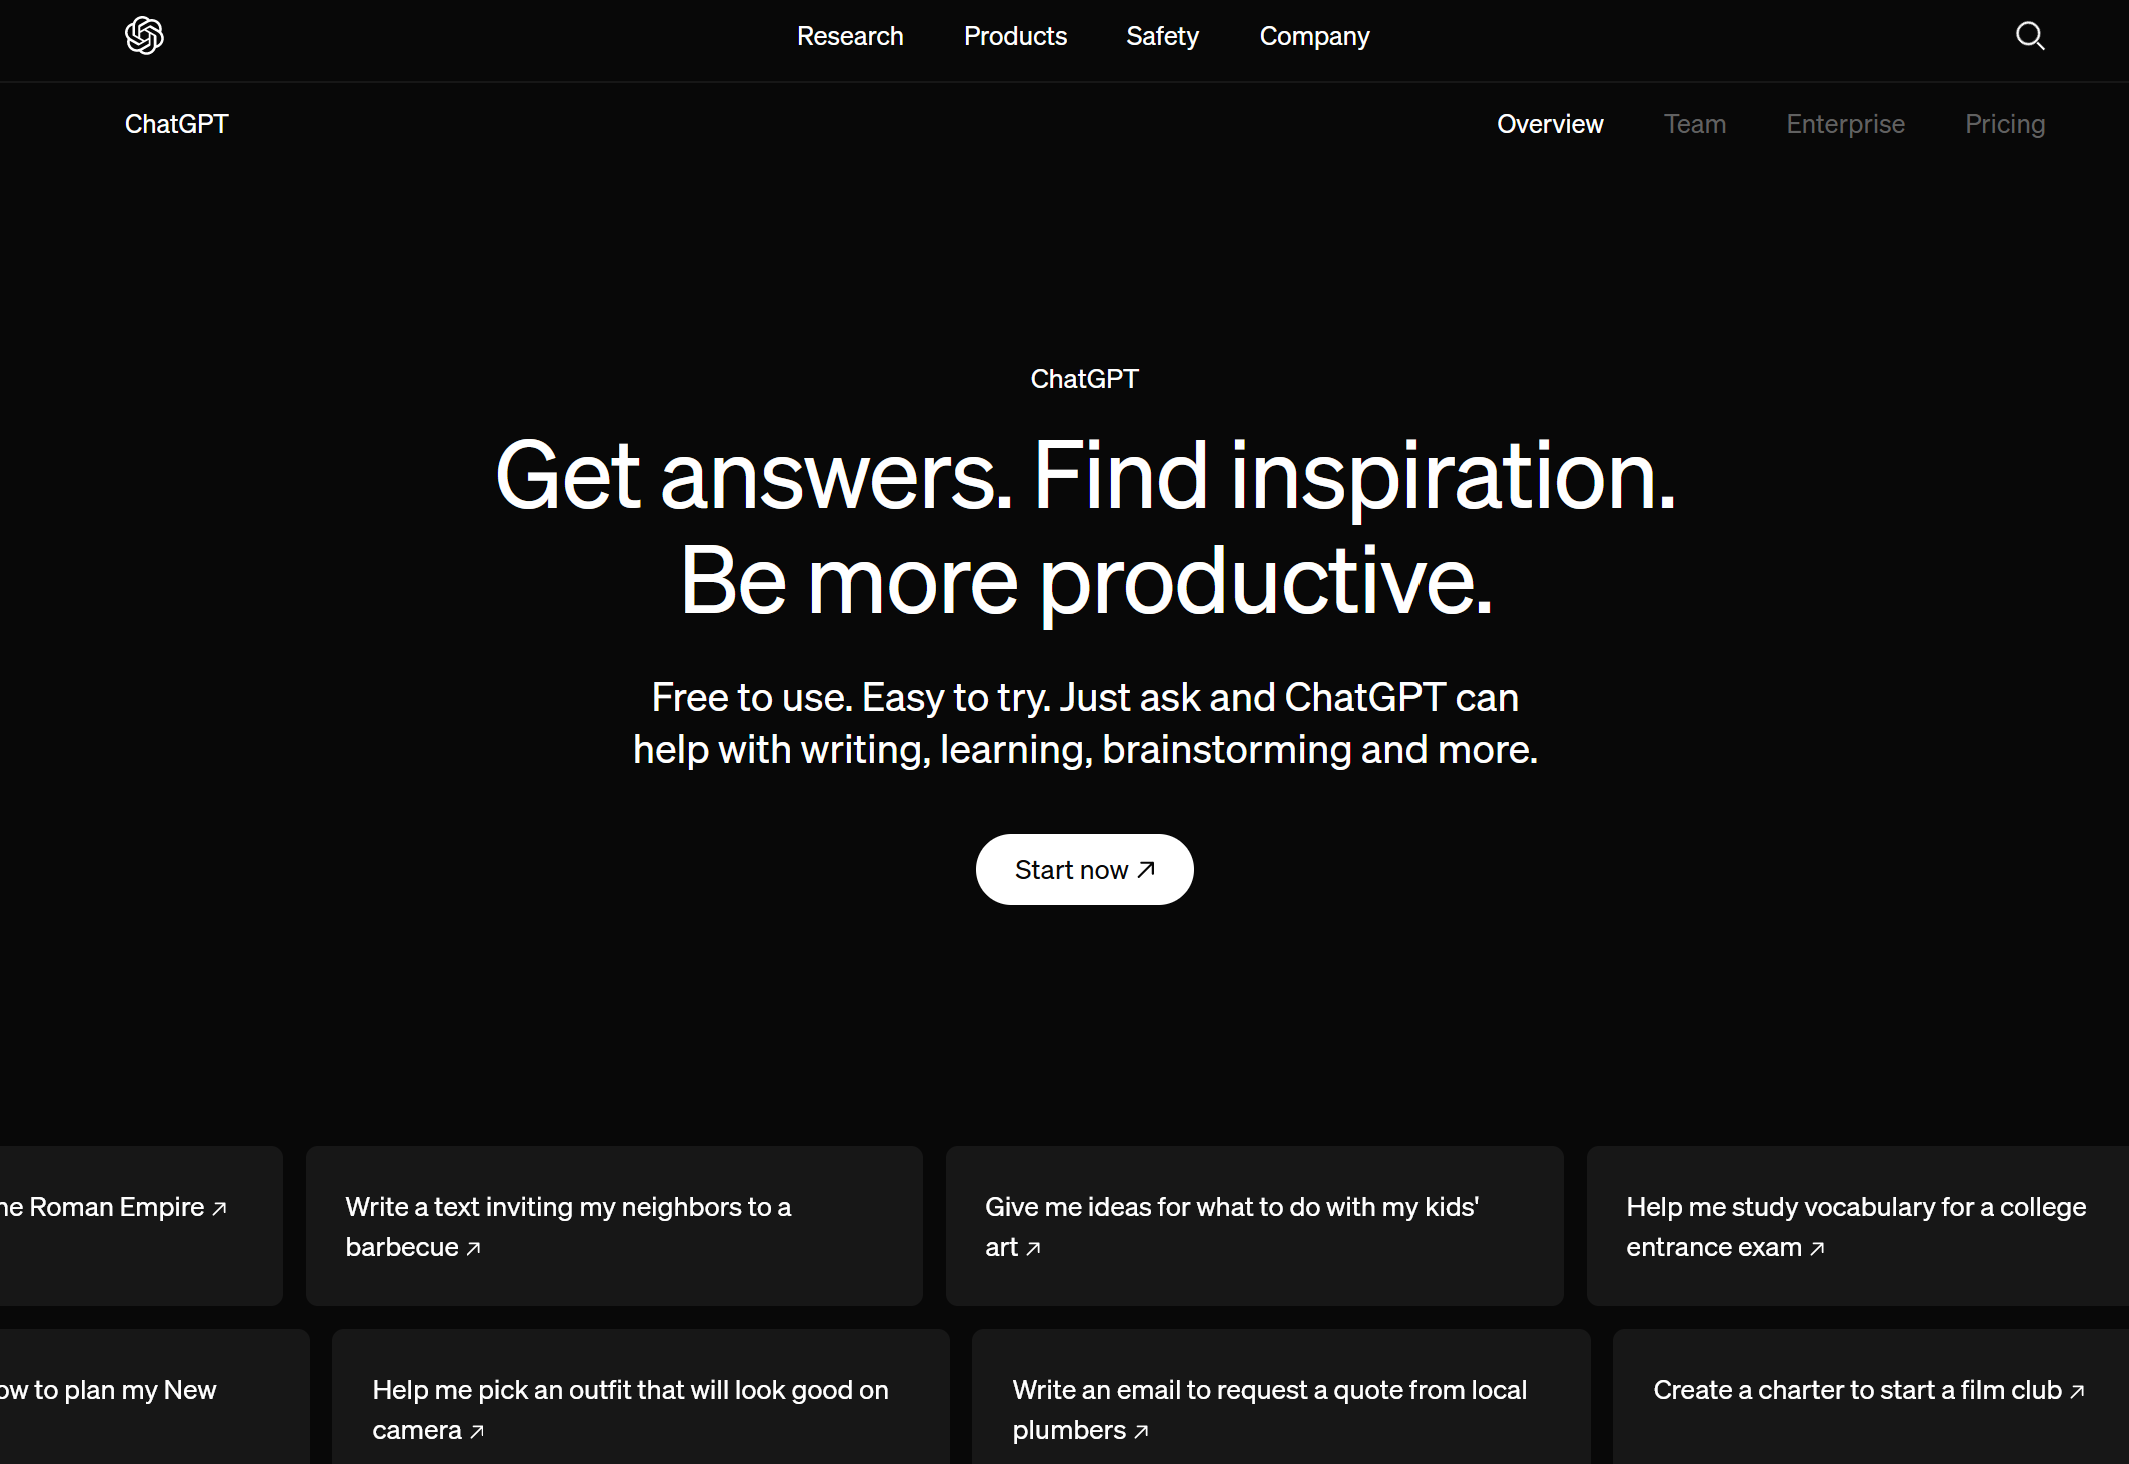
Quelle: https://openai.com/chatgpt/

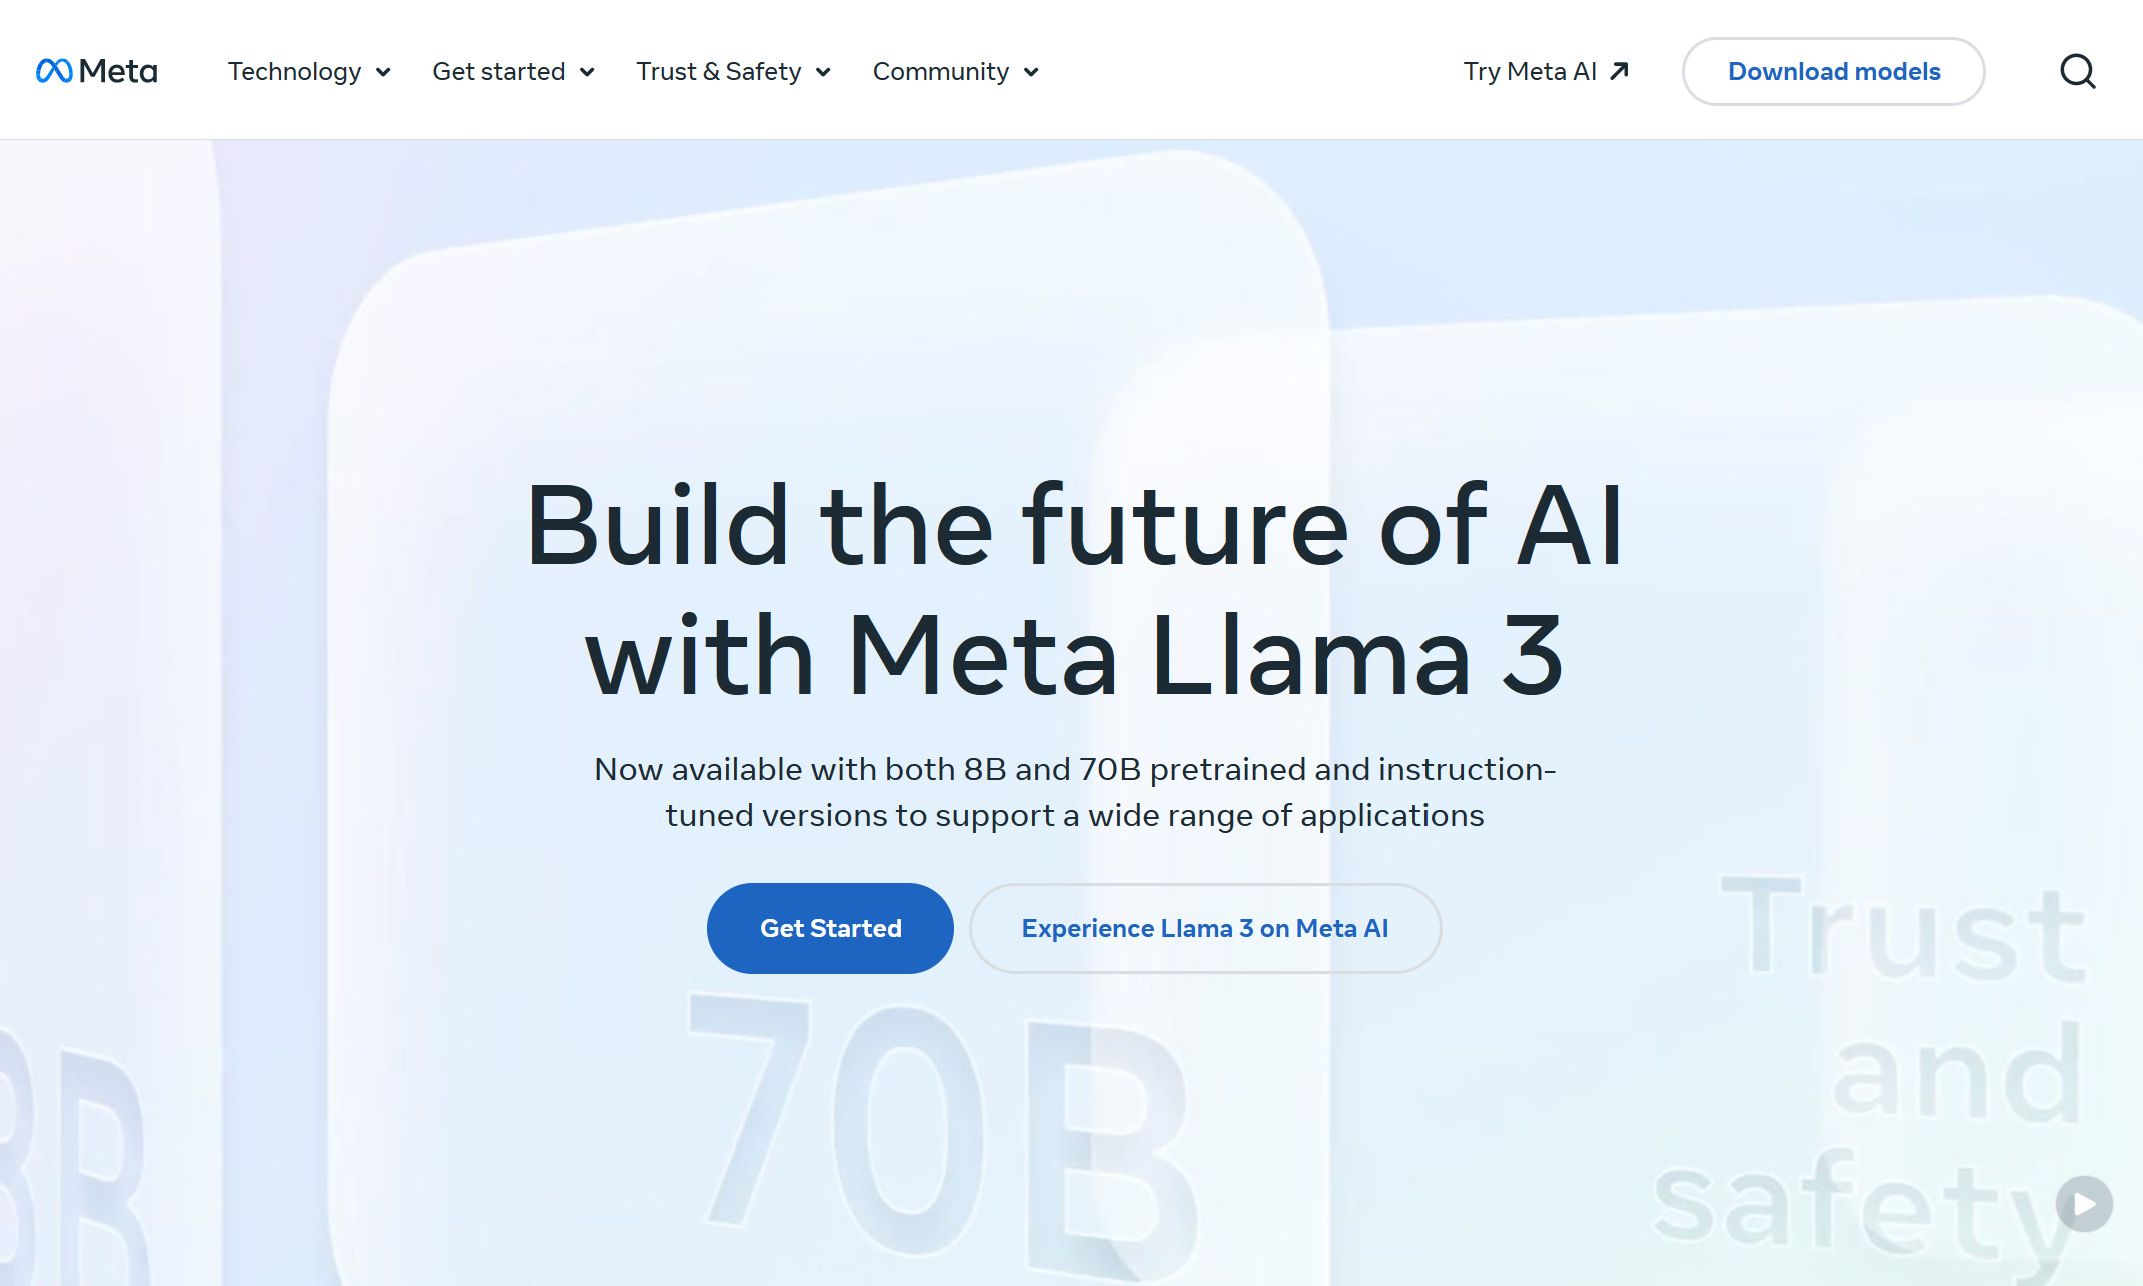
Quelle: https://llama.meta.com/llama3/

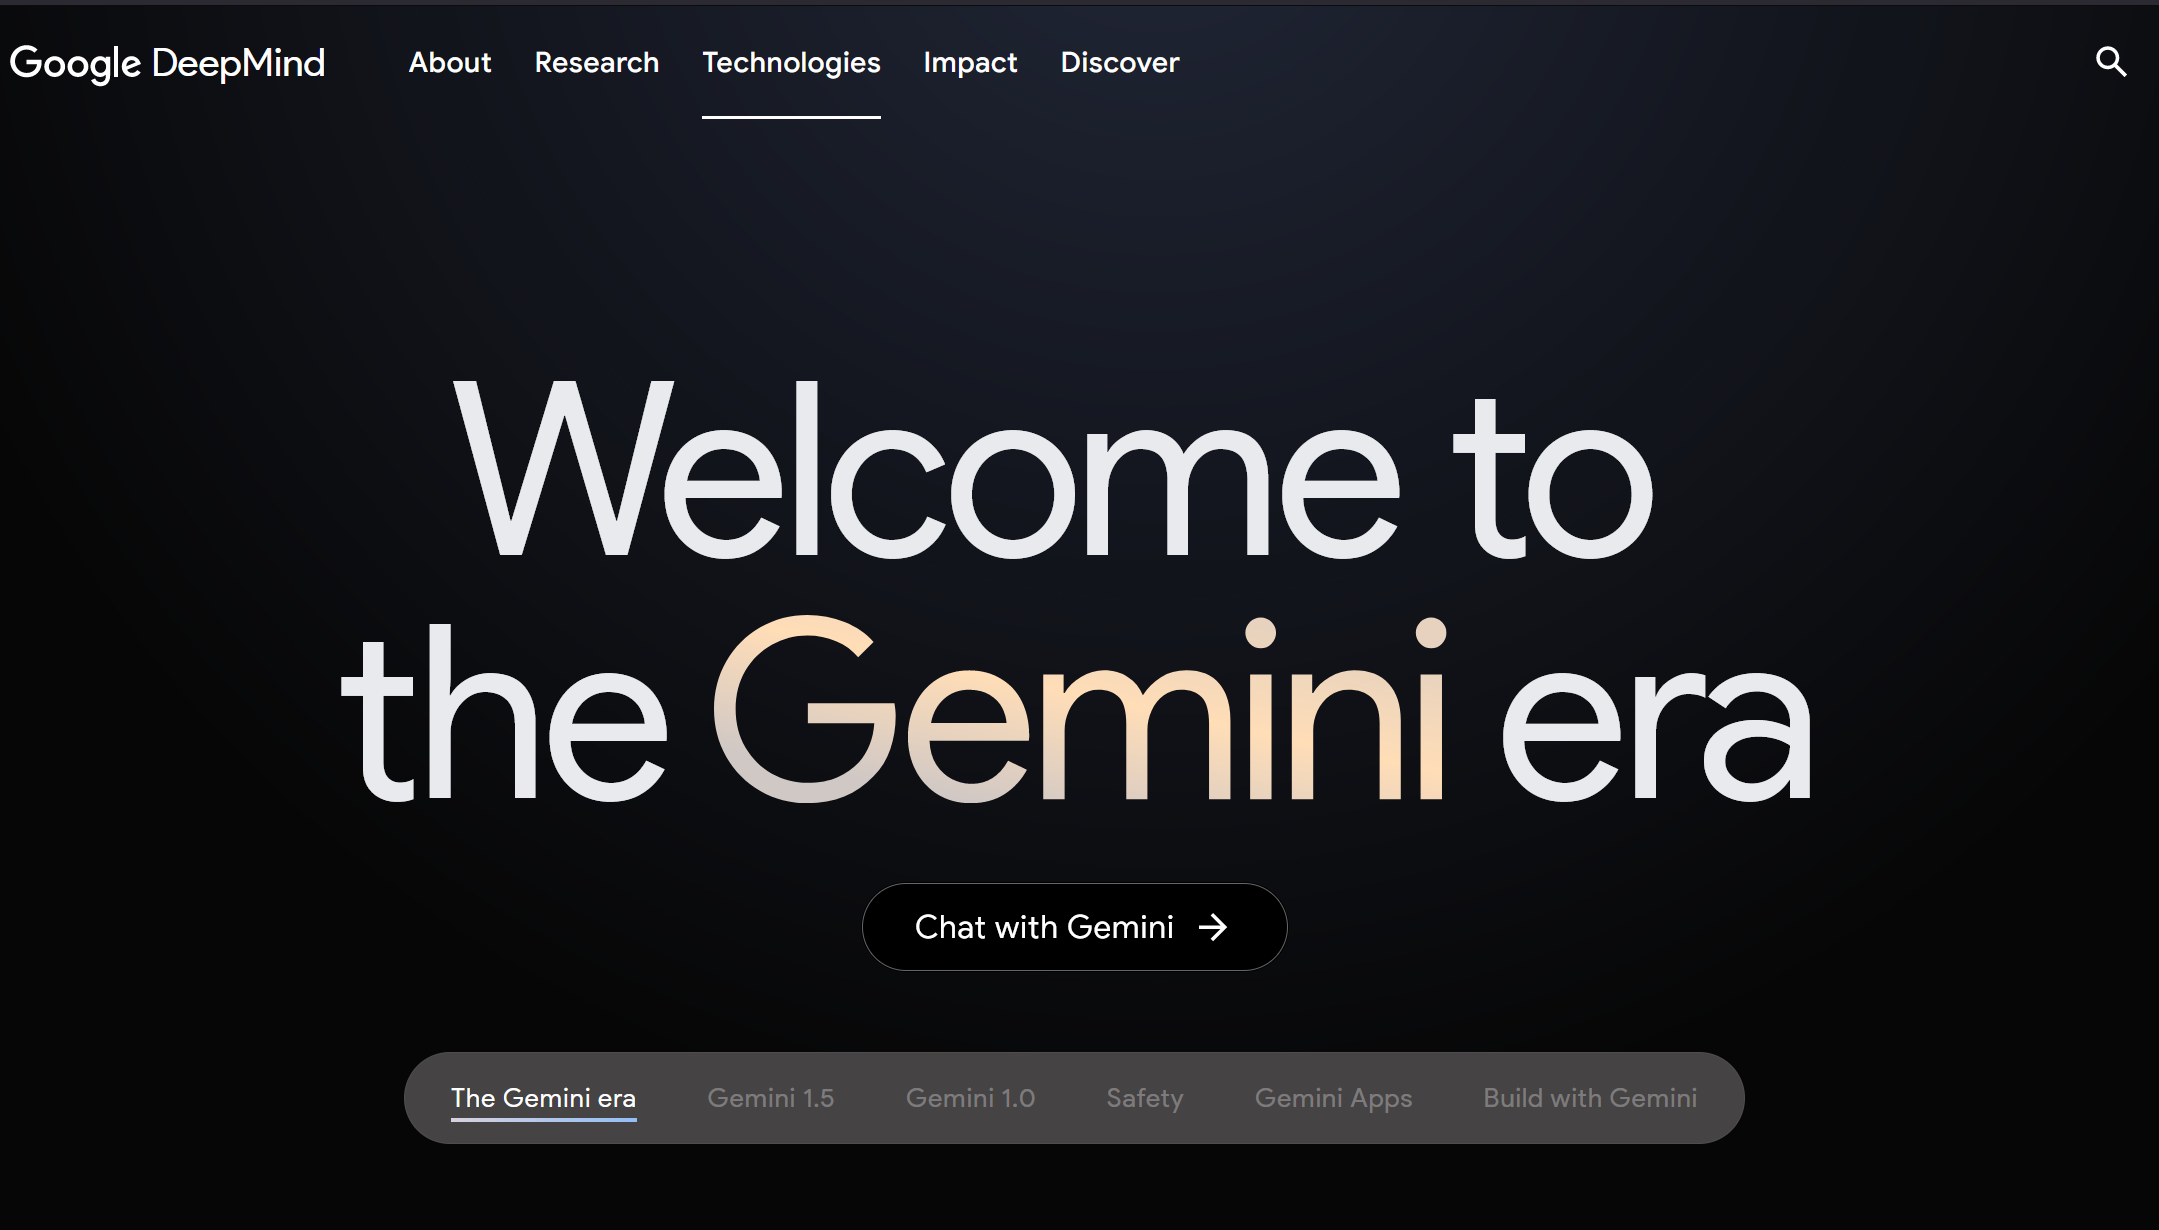
Quelle: https://deepmind.google/technologies/gemini/

## **Ein praktische Beispiel für digitale Serviceleistungen**

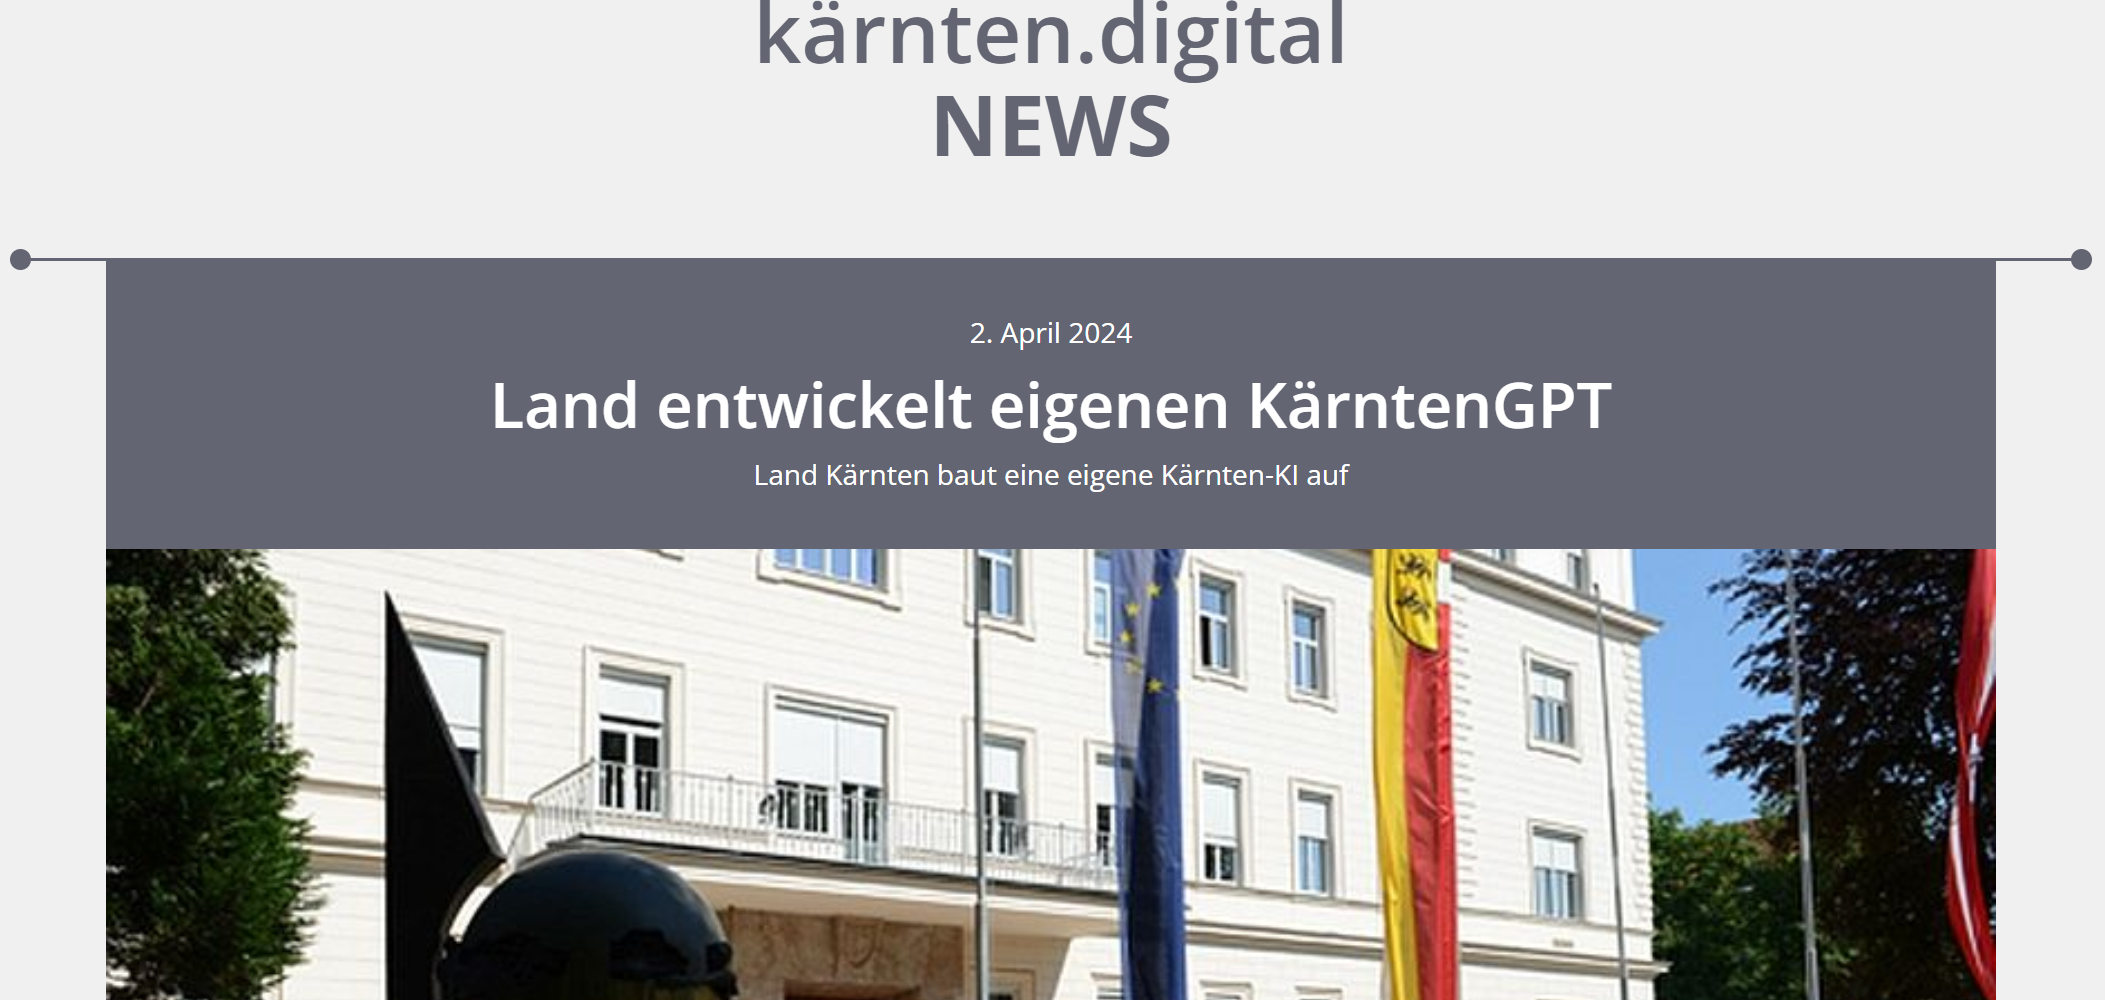

Anbindung von lokalem Wissen an ein Sprachmodell.

Quelle: https://www.kaernten-digital.at/news-detail/land-entwickelt-eigenen-k%C3%A4rntengpt.html

### Tools für Forschung und Entwicklung
Zusätzlich zu den verschiedenen LLMs wurde die Unterstützung durch Tools und Frameworks erheblich erweitert.

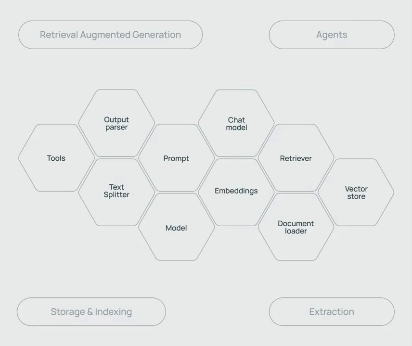

Quelle: https://www.langchain.com/

## **Was ist das Ziel dieser Hands-On Session?**

1.   Vergleich von Entwurf und finaler Version des IFG
2.   Analyse der Stellungnahmen
3.   Gegenüberstellung von Gesetzestext und der Stellungnahmen
4.   Chancen und Risiken vom Einsatz generativer KI
---

## **Demonstriert am Beispiel des Bundesgesetz über den Zugang zu Informationen (Informationsfreiheitsgesetz - IFG)**

* 95/ME XXVII. GP - Ministerialentwurf - Gesetzestext
* 61/A XXVII. GP - Initiativantrag - Gesetzestext (Arbeitsdokument ParlDion)
* Stellungnahmen (175 öffentliche Rückmeldungen als PDF verfügbar)

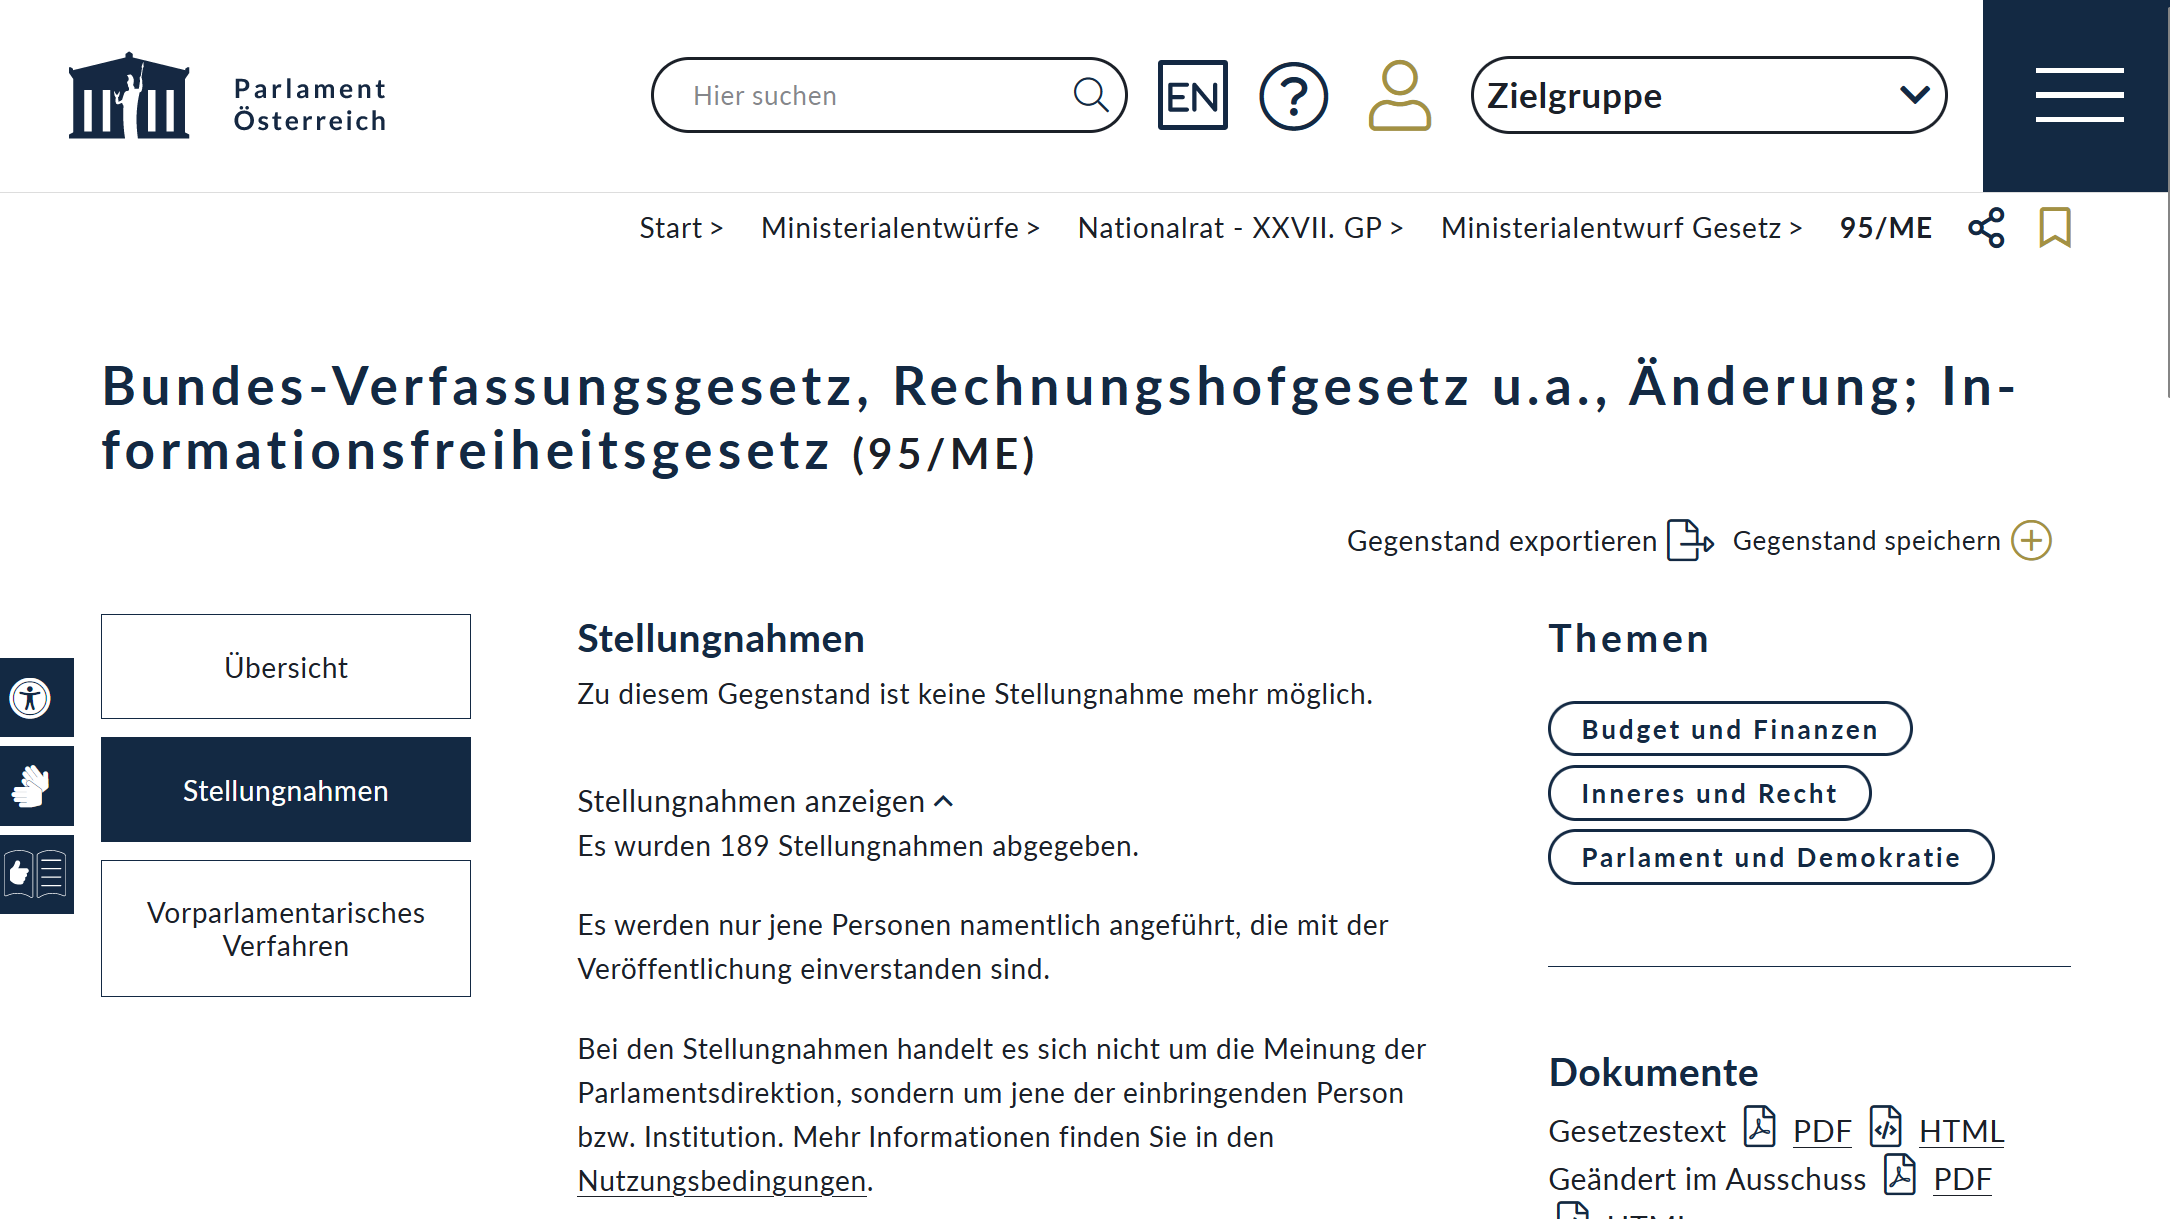

Quelle: https://www.parlament.gv.at/gegenstand/XXVII/ME/95?selectedStage=101

In [ ]:
# @title API-Key
open_ai_key = "" # @param {type:"string"}

# install dependencies
%pip install --upgrade --quiet  langchain langchain-community langchainhub langchain-openai langchain-chroma bs4 pypdf progressbar2 unstructured
%pip install -qU langchain-openai

import getpass
import os

openai_api_key = open_ai_key

import bs4
from langchain import hub
from langchain_community.document_loaders import PyPDFLoader
from langchain_chroma import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_community.document_loaders import TextLoader
import os
from openai import OpenAI
import progressbar



___
## **Vergleich der Gesetze**

Prompt [1]:

**Die folgenden Dokumente sind zwei Versionen des österreichischen "Informationsfreiheitsgesetzes". Dokument 1 ist der initiale Entwurf des Gesetzes. Dokument 2 ist eine überarbeitete Version, die Statements verschiedener Stakeholder berücksichtigt. Identifiziere alle Änderungen durch einen Vergleich von Dokument 1 und Dokument 2. Die Ausgabe sollte eine Liste von Aufzählungspunkten sein, die die Änderungen hervorheben. Antworte in deutscher Sprache.**

[1] von Englisch auf Deutsch übersetzt

In [3]:
# @title Antwort

# This section of the code simulates the output to ensure there are no connectivity issues during the presentation.
# Although this output is simulated, all the necessary code to fully replicate and run every aspect of this demonstration is included.

import textwrap
import time
import re

def generate_typing(text, typing_speed=0.005, bold=False):
    if bold:
        print("\033[1m", end='')  # Start bold
    for char in text:
        print(char, end='', flush=True)
        time.sleep(typing_speed)
    if bold:
        print("\033[0m", end='')  # End bold

def generate_print(text, width=150):
    paragraphs = text.split('\n\n')
    for paragraph in paragraphs:
        lines = paragraph.split('\n')
        for line in lines:
            # Wrap text to the specified width
            wrapped_lines = textwrap.wrap(line, width=width)
            for wrapped_line in wrapped_lines:
                # Handling Markdown bold by splitting the text on '**'
                parts = re.split(r'(\*\*.+?\*\*)', wrapped_line)
                for part in parts:
                    if part.startswith('**') and part.endswith('**'):
                        # Remove the asterisks for printing and mark as bold
                        part = part[2:-2]  # Strip the bold markers
                        generate_typing(part, bold=True)
                    else:
                        generate_typing(part, bold=False)
                print()  # Newline after each wrapped line
            #print()  # Extra newline after each paragraph

# full prompt:
complete_promt = """
The following documents are two versions of the Austrian "Informationsfreiheitsgesetz". Document 1 is the initial draft of the law. Document 2 is a refined version that incorporates feedback from various stakeholders. Identify all changes made by comparing Document 1 and Document 2. The output should be a list of bullet points highlighting the changes. Answer in the German language.
"""

text = """
Im Vergleich von Dokument 1 zu Dokument 2 wurden folgende Änderungen im Informationsfreiheitsgesetz vorgenommen:
- **§ 1 - Anwendungsbereich**: In Dokument 2 wurde die Liste der Organe, auf die sich das Gesetz bezieht, erweitert und präzisiert, insbesondere wurde der Bezug auf spezifische Artikel des Bundes-Verfassungsgesetzes hinzugefügt.
- **§ 2 - Begriffsbestimmungen**: In Dokument 2 wurde ausdrücklich ausgeschlossen, dass nicht zu veraktende Entwürfe und Notizen als Information im Sinne des Gesetzes gelten.
- **§ 3 - Zuständigkeit**: Die detaillierte Auflistung der Zuständigkeiten einzelner Organe in Dokument 1 wurde in Dokument 2 gestrafft und teilweise neu formuliert. Es wurden spezifische Änderungen zur Zuständigkeit, einschließlich des Bundesrates, gemacht.
- **§ 5 - Recht auf Zugang zu Informationen**: Die Formulierung und die Bedingungen unter denen der Zugang gewährt wird, wurden aktualisiert und teilweise vereinfacht.
- **Änderungen bei der Geheimhaltung (§ 6)**: Es wurden präzisere Bedingungen für die Geheimhaltungsgründe eingeführt.
- **Verfahren zur Informationsanforderung (§§ 7-8)**: Anpassungen bei den Fristen wurden vorgenommen, insbesondere wurde die maximale Frist für die Informationsgewährung von vier auf acht Wochen verlängert.
- **Gebühren (§ 12)**:Es wurde eine Änderung eingeführt, die eine Gebühr für bestimmte Anträge festlegt, obwohl Anträge allgemein von Gebühren befreit sind.
"""
generate_print(text)

Im Vergleich von Dokument 1 zu Dokument 2 wurden folgende Änderungen im Informationsfreiheitsgesetz vorgenommen:
- § 1 - Anwendungsbereich: In Dokument 2 wurde die Liste der Organe, auf die sich das Gesetz bezieht, erweitert und präzisiert, insbesondere wurde
der Bezug auf spezifische Artikel des Bundes-Verfassungsgesetzes hinzugefügt.
- § 2 - Begriffsbestimmungen: In Dokument 2 wurde ausdrücklich ausgeschlossen, dass nicht zu veraktende Entwürfe und Notizen als Information im
Sinne des Gesetzes gelten.
- § 3 - Zuständigkeit: Die detaillierte Auflistung der Zuständigkeiten einzelner Organe in Dokument 1 wurde in Dokument 2 gestrafft und teilweise
neu formuliert. Es wurden spezifische Änderungen zur Zuständigkeit, einschließlich des Bundesrates, gemacht.
- § 5 - Recht auf Zugang zu Informationen: Die Formulierung und die Bedingungen unter denen der Zugang gewährt wird, wurden aktualisiert und
teilweise vereinfacht.
- Änderungen bei der Geheimhaltung (§ 6): Es wurden präzisere Bedingunge

___

## **Analyse der Stellungnahmen**

### Vorgehensweise

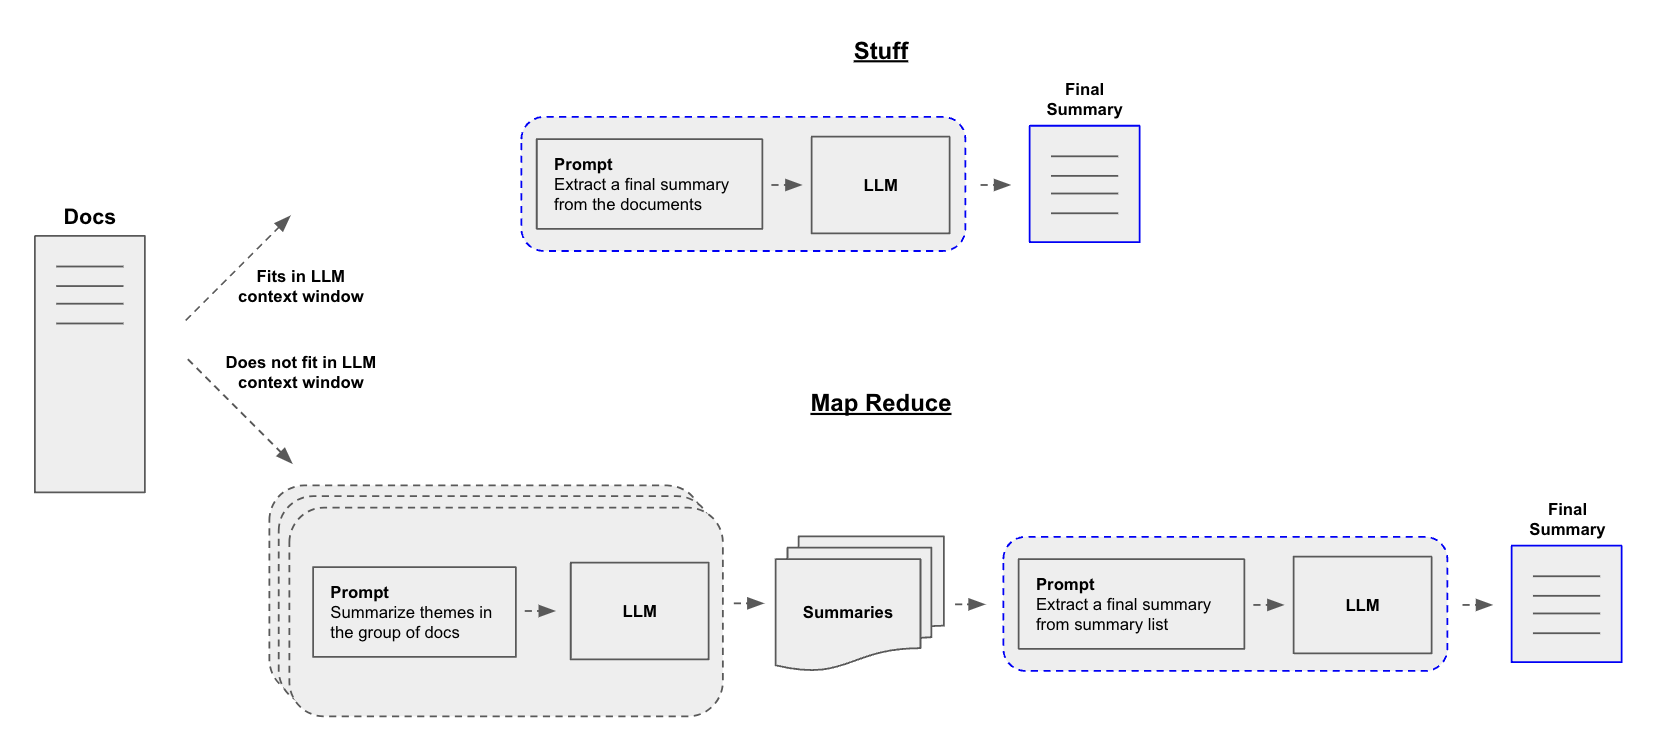
Quelle: https://python.langchain.com/v0.1/docs/use_cases/summarization/

___
### Durchgeführte Schritte
1.  Stellungnahmen automatisiert herunterladen
2.  Stellungnahmen in maschinenlesbaren Text konvertieren (PDF->Text)
3.  Zusammenfassung der einzelnen Stellungnahmen (aus Schritt 2)
4.  Zusammenfassung über alle einzelnen Stellungnahmen basierend auf Schritt 3

### Fragen (= Prompt) für die Generierung der Zusammenfassung [2]
1. **Identifizieren Sie die Hauptpunkte, die von den Stakeholdern in ihren begleitenden Nachrichten (und, falls möglich, in ihren beigefügten Dokumenten) angesprochen werden.**
2. **Fassen Sie das Feedback der Stakeholder in Stichpunkten zusammen, gruppieren Sie ähnliche Aussagen und heben Sie divergierende Meinungen hervor.**
3. **Clustern Sie Meinungen nach positiver und negativer Stimmung (unterstützend oder gegen die vorgeschlagene Regelung).**
4. **Ermitteln Sie Evidenz aus den Stellungnahmen, welche die vorgeschlagenen Regeln verstärken oder widersprechen können.**

[2] Angelehnt an das Projekt "AI in Public Service and  Policy Making" der [DigHum Summer School 2023](https://caiml.org/dighum/summerschool2023/use-cases/#ai-in-public-service-and-policy-making) - von Englisch auf Deutsch übersetzt
___

In [ ]:
# @title 1.) Stellungnahmen automatisiert herunterladen

import requests
from bs4 import BeautifulSoup
import os
import re

def fetch_detail_links_from_rss(rss_url):
    response = requests.get(rss_url)
    soup = BeautifulSoup(response.content, features="xml")
    detail_page_links = []
    items = soup.find_all('item')
    for item in items:
        description_soup = BeautifulSoup(item.description.text, 'html.parser')
        link = description_soup.a['href']
        title = description_soup.a.get_text(strip=True)  # Optional: Fetch the title for naming.
        detail_page_links.append((link, title))
    return detail_page_links

def sanitize_filename(filename):
    """Remove invalid characters and limit length for compatibility."""
    filename = re.sub('[^a-zA-Z0-9 \n\.]', '', filename)  # Keep alphanumeric, spaces, and dots.
    filename = filename[:100]  # Limit filename length if necessary.
    return filename

def download_pdfs(detail_page_links, base_url, save_dir):
    i = 0
    for link, title in detail_page_links:
        detail_page_url = base_url + link
        detail_page_response = requests.get(detail_page_url)
        detail_soup = BeautifulSoup(detail_page_response.content, 'html.parser')
        pdf_links = detail_soup.find_all('a', href=lambda href: href and "/dokument/" in href)
        for pdf_link in pdf_links:
            pdf_href = pdf_link['href']
            if not pdf_href.lower().endswith('.pdf'):
                continue
            pdf_url = base_url + pdf_href
            file_name = sanitize_filename(title) + '.pdf'  # Use title as file name
            pdf_response = requests.get(pdf_url)
            with open(os.path.join(save_dir, file_name), 'wb') as f:
                f.write(pdf_response.content)
            print(f"Downloaded {file_name}")

            # START
            # please remove to run the full analysis (for the demo we limit the retrieved files to 5)
            i = i+1
            if i == 5:
              return
            # END

rss_url = "https://www.parlament.gv.at/Filter/api/filter/rss/142?FBEZ=FP_142_vhg&selectedStage=101&BEZUG_GP_CODE=XXVII&BEZUG_ITYP=ME&BEZUG_INR=95&SORTRNR=5&ASCDESC=DESC"
base_url = "https://www.parlament.gv.at"
save_dir = "downloaded_pdfs"
os.makedirs(save_dir, exist_ok=True)

detail_page_links = fetch_detail_links_from_rss(rss_url)
download_pdfs(detail_page_links, base_url, save_dir)

In [5]:
# @title 2.)  Stellungnahmen in maschinenlesbaren Text konvertieren (PDF-Text)

def convert_pdfs_to_pages(folder_path):
    """
    Convert PDF files in a specified folder to text.

    Args:
        folder_path (str): The folder path where the PDF files are located.

    Returns:
        list: A list of pages for each PDF file.
    """
    # Get the list of PDF files in the folder
    pdf_files = [file for file in os.listdir(folder_path) if file.endswith(".pdf")]

    pdf_list = []

    # Iterate over each PDF file and convert it to pages
    for pdf_file in pdf_files:
        pdf_path = os.path.join(folder_path, pdf_file)
        loader = PyPDFLoader(pdf_path)
        pages = loader.load()
        pdf_list.append(pages)
        #print(f"Converted {pdf_file} to {len(pages)} pages.")

    return pdf_list

def save_pdf_text(pdf_list):
    """
    Save the text of each PDF (multiple pages per PDF) in a separate file.

    Args:
        pdf_list (list): A list of PDF objects.

    Returns:
        None
    """
    # Create the folder if it doesn't exist
    folder_name = "text_per_pdf"
    os.makedirs(folder_name, exist_ok=True)

    # Save the text of each PDF in a separate file
    for i, pdf in enumerate(pdf_list):
        pdf_name = pdf[0].metadata['source']
        # Extracting the second half of the text
        second_half = pdf_name.split("/")[1]
        # Replacing spaces with underscores
        pdf_name_shortened = second_half.replace(' ', '_')

        feedback_text = []
        for j, page in enumerate(pdf):
            feedback_text.append(page.page_content)
            #print(page.page_content)
        with open(f"{folder_name}/{pdf_name_shortened}.txt", "w") as f:
            f.write("\n".join(feedback_text))

pdf_list  = convert_pdfs_to_pages("downloaded_pdfs")
save_pdf_text(pdf_list)

In [ ]:
# @title 3.)  Zusammenfassung der einzelnen Stellungnahmen (aus Schritt 2)

llm = ChatOpenAI(api_key=openai_api_key,model="gpt-4o")

def summarize_with_gpt(text):
    prompt = ChatPromptTemplate.from_template("""Answer the following questions in German based only on the provided context:
    <context>
    {context}
    </context>

    Questions: {input}""")

    document_chain = create_stuff_documents_chain(llm, prompt)
    response = document_chain.invoke({
        "input": "Identify the key points raised by the stakeholder in their accompanying messages (and, if feasible, their attached documents) \
        Summarise the stakeholder feedback in bullets, grouping similar statements and highlighting divergent opinions \
        Cluster opinions according to positive and negative sentiment (supportive or against the proposed regulation) \
        Identify evidence from the inputs that can reinforce or contradict the proposed rules",
        "context": text
    })
    return(response)

def summarize_each_feedback(folder_path):

    # Create the folder if it doesn't exist
    folder_name = "summarization"
    os.makedirs(folder_name, exist_ok=True)

    text_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]
    print(text_files)
    for text_file in text_files:

        # Check if the summary file already exists
        summary_path = os.path.join(folder_name, text_file)
        if os.path.exists(summary_path):
            print(f"Skipping existing summary for {text_file}")

        text_path = os.path.join(folder_path, text_file)
        loader = TextLoader(text_path)
        text =  loader.load()
        summarized_text = summarize_with_gpt(text)
        file_name_without_extension = text_file.rsplit('.', 2)[0].rsplit('_', 1)[0]  # Remove the extension

        with open(f"{folder_name}/{text_file}", "w") as f:
            f.write("Feedback from: "+file_name_without_extension + "\n" + "\n" + summarized_text)

summarize_each_feedback("text_per_pdf")

In [ ]:
# @title 4.)  Zusammenfassung über alle einzelnen Stellungnahmen basierend auf Schritt 3

# Run chain
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.chains.llm import LLMChain
from langchain.chains.llm import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain
from langchain_community.document_loaders import DirectoryLoader

# Reduce
reduce_template = """The following is set of summaries:
{docs}
Take these and distill it into a final, consolidated summary.
Identify the key points raised by the stakeholders in their accompanying messages (and, if feasible, their attached documents)
Summarise the stakeholder feedback in bullets, grouping similar statements and highlighting divergent opinions
Cluster opinions according to positive and negative sentiment (supportive or against the proposed regulation)
Identify evidence from the inputs that can reinforce or contradict the proposed rules
Each stakeholder feedback starts with the line \"Feedback from: \". Underline the key aspects and provide examples from the provided summaries. Also, include the name of the stakeholder. List the names of very positive and very negative stakeholders.
Helpful Answer:"""

reduce_prompt = PromptTemplate.from_template(reduce_template)

reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

# Takes a list of documents, combines them into a single string, and passes this to an LLMChain
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="docs"
)

# Combines and iteratively reduces the mapped documents
reduce_documents_chain = ReduceDocumentsChain(
    # This is final chain that is called.
    combine_documents_chain=combine_documents_chain,
    # If documents exceed context for `StuffDocumentsChain`
    collapse_documents_chain=combine_documents_chain,
    # The maximum number of tokens to group documents into.
    token_max=128000,
)
loader = DirectoryLoader('./summarization/', glob="*.txt")
docs = loader.load()
meta_summarization = reduce_documents_chain.run(docs)

file_name = "./meta-summarization.txt"
with open(file_name, 'w') as file:
    file.write(meta_summarization)

### Ergebnis der konsolidierten Zusammenfassung der Stellungnahmen

Prompt [3]:

**Das Folgende ist eine Zusammenfassung von Dokumenten: {Dokumente}**

- **Verarbeiten Sie diese zu einer endgültigen, konsolidierten Zusammenfassung.**
- **Identifizieren Sie die Schlüsselpunkte, die von den Stakeholdern in ihren begleitenden Nachrichten (und, falls möglich, in ihren beigefügten Dokumenten) hervorgehoben wurden.**
- **Fassen Sie das Feedback der Stakeholder in Stichpunkten zusammen, indem Sie ähnliche Aussagen gruppieren und divergierende Meinungen hervorheben.**
- **Gruppieren Sie Meinungen nach positivem und negativem Sentiment (Unterstützung oder Ablehnung der vorgeschlagenen Regelung).**
- **Identifizieren Sie Belege aus den Eingaben, die die vorgeschlagenen Regeln verstärken oder widersprechen können.**
- **Jedes Feedback der Stakeholder beginnt mit der Zeile "Feedback von:". Unterstreichen Sie die Schlüsselaspekte und geben Sie Beispiele aus den bereitgestellten Zusammenfassungen an. Schließen Sie auch den Namen des Stakeholders ein. Listen Sie die Namen der sehr positiven und sehr negativen Stakeholder auf. [...]**

[3] von Englisch auf Deutsch übersetzt

In [8]:
# @title Antwort

text = """
**Zusammengefasste Übersicht des Stakeholder-Feedbacks:**

#### Hauptpunkte:
- **Transparenz und Informationszugang:** Die meisten Stakeholder unterstützen die Initiative zur Verbesserung der Transparenz und des öffentlichen Zugangs zu Informationen.
- **Bedenken bezüglich der Umsetzung:** Es gibt erhebliche Bedenken hinsichtlich der administrativen Belastung, der möglichen missbräuchlichen Nutzung von Informationsanfragen und der Praktikabilität der Umsetzung der vorgeschlagenen Vorschriften.
- **Datenschutz und Privatsphäre:** Mehrere Stakeholder äußerten Bedenken bezüglich des Schutzes persönlicher und sensibler Informationen.
- **Kosten- und Ressourcenauswirkungen:** Bedenken wurden hinsichtlich der potenziellen finanziellen und personellen Kosten geäußert, die mit der Einhaltung der neuen Vorschriften verbunden sind.
- **Rechtliche Klarheit und Definitionen:** Die Stakeholder betonten die Notwendigkeit klarerer Definitionen und präziserer rechtlicher Formulierungen, um Unklarheiten zu vermeiden und eine effektive Umsetzung zu gewährleisten.

#### Zusammenfassung des Stakeholder-Feedbacks:
- **Positives Feedback:**
  - Allgemeine Unterstützung für mehr Transparenz und das Recht auf Informationen.
  - Zustimmung zu spezifischen Maßnahmen wie der Einrichtung eines unabhängigen Informationsbeauftragten (von mehreren Stakeholdern vorgeschlagen).
- **Negatives Feedback:**
  - Bedenken über den breiten Umfang von Informationsanfragen und das Potenzial für Missbrauch.
  - Sorgen über die Auswirkungen auf die wettbewerbsneutrale Position, insbesondere in Bezug auf öffentliche Unternehmen.
  - Kritik an der potenziellen administrativen und finanziellen Belastung für öffentliche Einrichtungen und Unternehmen.

#### Meinungsbündelung:
- **Unterstützende Stimmungen:**
  - Viele Stakeholder schätzen den Schritt hin zu einer offeneren Regierung und der Erleichterung des Zugangs zu öffentlichen Informationen.
  - Positive Bemerkungen zu den Absichten, veraltete Geheimhaltungsgesetze abzuschaffen und durch modernere Transparenzvorschriften zu ersetzen.
- **Negative Stimmungen:**
  - Starke Bedenken hinsichtlich der Überschreitung der vorgeschlagenen Regeln in die operationelle Unabhängigkeit von Unternehmen und öffentlichen Einrichtungen.
  - Häufige Kritik am Potenzial für erhöhte Bürokratie und die Unklarheit rechtlicher Begriffe, die zu inkonsistenten Anwendungen des Gesetzes führen könnten.

#### Belege, die die vorgeschlagenen Regeln unterstützen oder ihnen widersprechen:
- **Unterstützende Belege:**
  - Beispiele für aktuelle Transparenzpraktiken, die durch die vorgeschlagenen Vorschriften verbessert werden könnten.
  - Positive Auswirkungen in Jurisdiktionen mit ähnlichen Gesetzen, die darauf hindeuten, dass die vorgeschlagenen Änderungen zu Verbesserungen in der Governance und im öffentlichen Vertrauen führen könnten.
- **Widersprüchliche Belege:**
  - Bedenken bezüglich der Bereitschaft öffentlicher Institutionen, die erhöhte Arbeitsbelastung zu bewältigen, was darauf hindeutet, dass der Vorschlag ohne ausreichende Grundlage zu ehrgeizig sein könnte.
  - Warnungen von Rechtsexperten und Stakeholdern über die unbeabsichtigten Folgen schlecht definierter Begriffe und einer übermäßig breiten Anwendung der Regeln.

#### Stakeholder mit sehr positiven Stimmungen:
- **Austro Control GmbH**
- **WWF Österreich**

#### Stakeholder mit sehr negativen Stimmungen:
- **Landesfischereiverband Salzburg**
- **Österreichischer Gemeindebund**

Diese Zusammenfassung erfasst den allgemeinen Ton und die spezifischen Bedenken verschiedener Stakeholder bezüglich der vorgeschlagenen Änderungen der Informationsfreiheitsgesetze. Obwohl es einen klaren Trend zur Unterstützung erhöhter Transparenz gibt, müssen signifikante Probleme angegangen werden, um eine erfolgreiche Implementierung und Wirksamkeit der vorgeschlagenen Vorschriften zu gewährleisten.
"""
generate_print(text)

Zusammengefasste Übersicht des Stakeholder-Feedbacks:
#### Hauptpunkte:
- Transparenz und Informationszugang: Die meisten Stakeholder unterstützen die Initiative zur Verbesserung der Transparenz und des öffentlichen
Zugangs zu Informationen.
- Bedenken bezüglich der Umsetzung: Es gibt erhebliche Bedenken hinsichtlich der administrativen Belastung, der möglichen missbräuchlichen Nutzung
von Informationsanfragen und der Praktikabilität der Umsetzung der vorgeschlagenen Vorschriften.
- Datenschutz und Privatsphäre: Mehrere Stakeholder äußerten Bedenken bezüglich des Schutzes persönlicher und sensibler Informationen.
- Kosten- und Ressourcenauswirkungen: Bedenken wurden hinsichtlich der potenziellen finanziellen und personellen Kosten geäußert, die mit der
Einhaltung der neuen Vorschriften verbunden sind.
- Rechtliche Klarheit und Definitionen: Die Stakeholder betonten die Notwendigkeit klarerer Definitionen und präziserer rechtlicher
Formulierungen, um Unklarheiten zu vermeiden und eine e

___

### Aber stimmt das alles wirklich?

**Die inhaltliche Zusammenfassung bildet die Rückmeldungen sehr gut ab. Aber die zwei genannten Rückmeldungen "Austro Control GmbH" und "WWF Österreich" haben kein positives Feedback gegeben:**

In [9]:
# @title Antwort

text = """
**Feedback from:** WWF_sterreich_World_Wide_Fund_For_Nature

Zusammenfassung der Stellungnahme des WWF Österreich zum Entwurf eines Bundesgesetzes:

**Positive Rückmeldungen:**
- Begrüßung der Abschaffung des Amtsgeheimnisses und der Einführung einer Informationspflicht des Staates sowie des Rechts auf Zugang zu Informationen für jede Person.
- Zustimmung zu einem einheitlichen Bundes-Informationsfreiheitsgesetz und zur Ausweitung der Informationspflicht auf alle staatlichen Stellen sowie staatsnahe Unternehmen.

**Negative Rückmeldungen:**
- Kritik an Lücken und Hürden im Gesetzentwurf, die noch vor der Beschlussfassung behoben werden sollten.
- Forderung nach Streichung der Ausnahme für börsennotierte Unternehmen in Bezug auf die Informationspflicht, da diese sich nach der Funktion und nicht nach der Organisationsform richten sollte.
- Kritik am Fehlen einer*s Informationsfreiheitsbeauftragten, der*die für eine erfolgreiche Umsetzung des Gesetzes entscheidend wäre.
- Vorschlag zur Halbierung der Auskunftsfristen von vier auf zwei Wochen, um eine schnellere und transparentere Abwicklung zu gewährleisten.
- Bedenken gegen den vorgeschlagenen § 9 Abs 2 IFG, der den Zugang zu Informationen unzulässig erschweren könnte.
- Forderung nach engerer Fassung der Geheimhaltungstatbestände und Einführung einer Verhältnismäßigkeitsklausel, um das öffentliche Interesse an der Bekanntgabe von Informationen stärker zu berücksichtigen.

**Zusätzliche Vorschläge:**
- Regelung des Informationsbegriffs ähnlich wie in den Umweltinformationsgesetzen, um den Zugang zu Informationen zu erleichtern.
- Beschleunigung des Rechtsschutzverfahrens durch Einführung einer „Bescheid-Automatik“ oder Verkürzung der Entscheidungsfrist auf zwei Wochen, um effektiven Rechtsschutz zu garantieren.

Die Stellungnahme des WWF Österreich zeigt eine grundsätzliche Unterstützung für das Vorhaben der Regierung, fordert jedoch wichtige Anpassungen und Verbesserungen, um das Gesetz wirksamer und gerechter zu gestalten."""
generate_print(text)

Feedback from: WWF_sterreich_World_Wide_Fund_For_Nature
Zusammenfassung der Stellungnahme des WWF Österreich zum Entwurf eines Bundesgesetzes:
Positive Rückmeldungen:
- Begrüßung der Abschaffung des Amtsgeheimnisses und der Einführung einer Informationspflicht des Staates sowie des Rechts auf Zugang zu Informationen
für jede Person.
- Zustimmung zu einem einheitlichen Bundes-Informationsfreiheitsgesetz und zur Ausweitung der Informationspflicht auf alle staatlichen Stellen sowie
staatsnahe Unternehmen.
Negative Rückmeldungen:
- Kritik an Lücken und Hürden im Gesetzentwurf, die noch vor der Beschlussfassung behoben werden sollten.
- Forderung nach Streichung der Ausnahme für börsennotierte Unternehmen in Bezug auf die Informationspflicht, da diese sich nach der Funktion und
nicht nach der Organisationsform richten sollte.
- Kritik am Fehlen einer*s Informationsfreiheitsbeauftragten, der*die für eine erfolgreiche Umsetzung des Gesetzes entscheidend wäre.
- Vorschlag zur Halbierung der Au

___

### Gegenüberstellung von Entwurf zu Finaler Version und den Stellungnahmen

Prompt [4]:

**Bitte analysieren und vergleichen Sie die Änderungen, die von der Entwurfsfassung des Gesetzes bis zur endgültigen Version vorgenommen wurden, mit der konsolidierten Zusammenfassung der Stellungnahmen. Ziel ist es, eventuelle Überschneidungen zwischen den vorgenommenen Änderungen und den in den Stellungnahmen angesprochenen Punkten zu identifizieren. [...]**

[4] von Englisch auf Deutsch übersetzt

In [10]:
# @title Antwort

# full prompt:
complete_promt = """
### Task
Please analyze and compare the changes made from the draft version of the law to the final version against the consolidated summary of feedback (Stellungnahmen). The goal is to identify any overlaps between the changes made and the points raised in the feedback. Output in German within a markdown code box.
### Input
1. **Consolidated Summary of Feedback (Stellungnahmen):**
   ```
   [add consolidated summary here]
   ```
2. **Changes from Draft to Final Version of the Law:**
   ```
   [add law diff here]
   ```
### Requirements
1. Identify any overlaps between the changes made to the law and the points raised in the feedback.
2. Determine whether the points from the feedback have been incorporated into the final version of the law.
### Output
Please provide your analysis in the following format:
```markdown
## Analysis of Changes and Feedback Incorporation
### Overlapping Changes
- [Detail any changes that overlap with the feedback points]
### Feedback Points Incorporated
- [Detail which feedback points have been incorporated into the final version of the law]
### Summary
- [Provide a summary of the extent to which the feedback was addressed in the final version of the law]
```
"""

text = """
## Analysis of Changes and Feedback Incorporation

### Overlapping Changes
- **§ 1 - Anwendungsbereich**: Die Erweiterung und Präzisierung der Liste der Organe im finalen Gesetz berücksichtigt das Feedback zur Notwendigkeit klarer Definitionen und präziser rechtlicher Sprache.
- **§ 2 - Begriffsbestimmungen**: Der Ausschluss von nicht zu veraktenden Entwürfen und Notizen als Information spricht die Bedenken zur Klarheit und Definitionen der Begriffe an, die von Stakeholdern geäußert wurden.
- **§ 5 - Recht auf Zugang zu Informationen**: Die Aktualisierung und Vereinfachung der Formulierungen und Bedingungen für den Zugang reflektiert das positive Feedback zur Förderung von Transparenz und öffentlichen Informationszugang.
- **Änderungen bei der Geheimhaltung (§ 6)**: Die Einführung präziserer Bedingungen für Geheimhaltungsgründe adressiert die Bedenken zur Daten- und Privatsphäreschutz.
- **Verfahren zur Informationsanforderung (§§ 7-8)**: Die Verlängerung der maximalen Frist von vier auf acht Wochen spricht die praktischen Bedenken zur Umsetzung der neuen Regelungen an, einschließlich der administrativen Belastung und Ressourcenkosten.
- **Gebühren (§ 12)**: Die Einführung einer Gebühr für bestimmte Anträge könnte auf das Feedback zu den Kosten- und Ressourcenauswirkungen reagieren.

### Feedback Points Incorporated
- **Legal Clarity and Definitions**: Klarere Definitionen und präzisere rechtliche Sprache wurden eingeführt (z.B. §§ 1 und 2).
- **Data Protection and Privacy**: Verbesserte Bedingungen für Geheimhaltungsgründe (§ 6).
- **Concerns About Implementation**: Verlängerte Fristen für die Informationsgewährung und Einführung einer Gebühr für bestimmte Anträge (§§ 7-8, 12) spiegeln die praktischen Bedenken wider.
- **Transparency and Information Access**: Die Unterstützung von Transparenz und öffentlichem Informationszugang durch die vereinfachten Bedingungen (§ 5).

### Summary
- Das finale Gesetz zeigt deutliche Bemühungen, die im Feedback der Stakeholder angesprochenen Punkte zu adressieren. Klare Definitionen und präzisere rechtliche Sprache wurden eingeführt, um Ambiguitäten zu vermeiden. Datenschutz- und Privatsphäreaspekte wurden durch präzisere Geheimhaltungsgründe berücksichtigt. Die praktischen Bedenken hinsichtlich der Umsetzung wurden durch Anpassungen bei den Fristen und die Einführung einer Gebühr für bestimmte Anträge angesprochen. Insgesamt reflektiert das finale Gesetz viele der zentralen Anliegen, die im Konsolidierten Feedback geäußert wurden, und zeigt eine Reaktion auf sowohl positive als auch negative Rückmeldungen der Stakeholder.
"""
generate_print(text)

## Analysis of Changes and Feedback Incorporation
### Overlapping Changes
- § 1 - Anwendungsbereich: Die Erweiterung und Präzisierung der Liste der Organe im finalen Gesetz berücksichtigt das Feedback zur Notwendigkeit
klarer Definitionen und präziser rechtlicher Sprache.
- § 2 - Begriffsbestimmungen: Der Ausschluss von nicht zu veraktenden Entwürfen und Notizen als Information spricht die Bedenken zur Klarheit und
Definitionen der Begriffe an, die von Stakeholdern geäußert wurden.
- § 5 - Recht auf Zugang zu Informationen: Die Aktualisierung und Vereinfachung der Formulierungen und Bedingungen für den Zugang reflektiert das
positive Feedback zur Förderung von Transparenz und öffentlichen Informationszugang.
- Änderungen bei der Geheimhaltung (§ 6): Die Einführung präziserer Bedingungen für Geheimhaltungsgründe adressiert die Bedenken zur Daten- und
Privatsphäreschutz.
- Verfahren zur Informationsanforderung (§§ 7-8): Die Verlängerung der maximalen Frist von vier auf acht Wochen sprich

___

## **Chancen**
- Zugänglichkeit von Informationen für Personen mit unterschiedlichen sozialen, sprachlichen, kulturellen, beruflichen und Bildungshintergründen
- Zielorientierte, automatisierte Verarbeitung von großen Mengen an Information in relativ kurzer Zeit
- Aktuell viele Investitionen in Forschung und Tooling
- Prozessvereinfacherung in vielen Bereichen
- Verwendung von lokalem Wissen und Modellen, um Halluzination entgegenzuwirken und Daten in der eigenen Infrakstruktur zur behalten

## **Risiken**
- Teilen der Daten bei Verwendung propriäterer Lösungen
- Intransparenz bzgl. der Trainingsdaten auch bei vielen Open Source Modellen
- Bias in Trainingsdaten beeinflusst Antwortverhalten
- "Primacy- und Recency-Effekte" beobachtbar
- Halluzination trotz Anbindung lokalen Wissens (z.B. bei der Zusammenfassung der Texte)
- Verantworungsbewusster Umgang mit Ressourcen notwendig
- Schädliche Nutzung z.B. zur Generierung von Fraud-Mails
- Bewertung der Information durch Nutzer/Experte
___

## **Beispiele für verfügbare Services**
### Digital Europe AI-Based Services
[https://language-tools.ec.europa.eu/](https://language-tools.ec.europa.eu/)

- EU-Kommission stellt der Öffentlichkeit im Rahmen der Digital Europe Intiative einige AI-basierte Tools zur Verfügung
- Basierend auf OpenAIs GPT (-> eingeschränkte Anwendungsbereiche)
- Vordefinierte Prompts, die den Output im vorgegebenen Format ausgeben

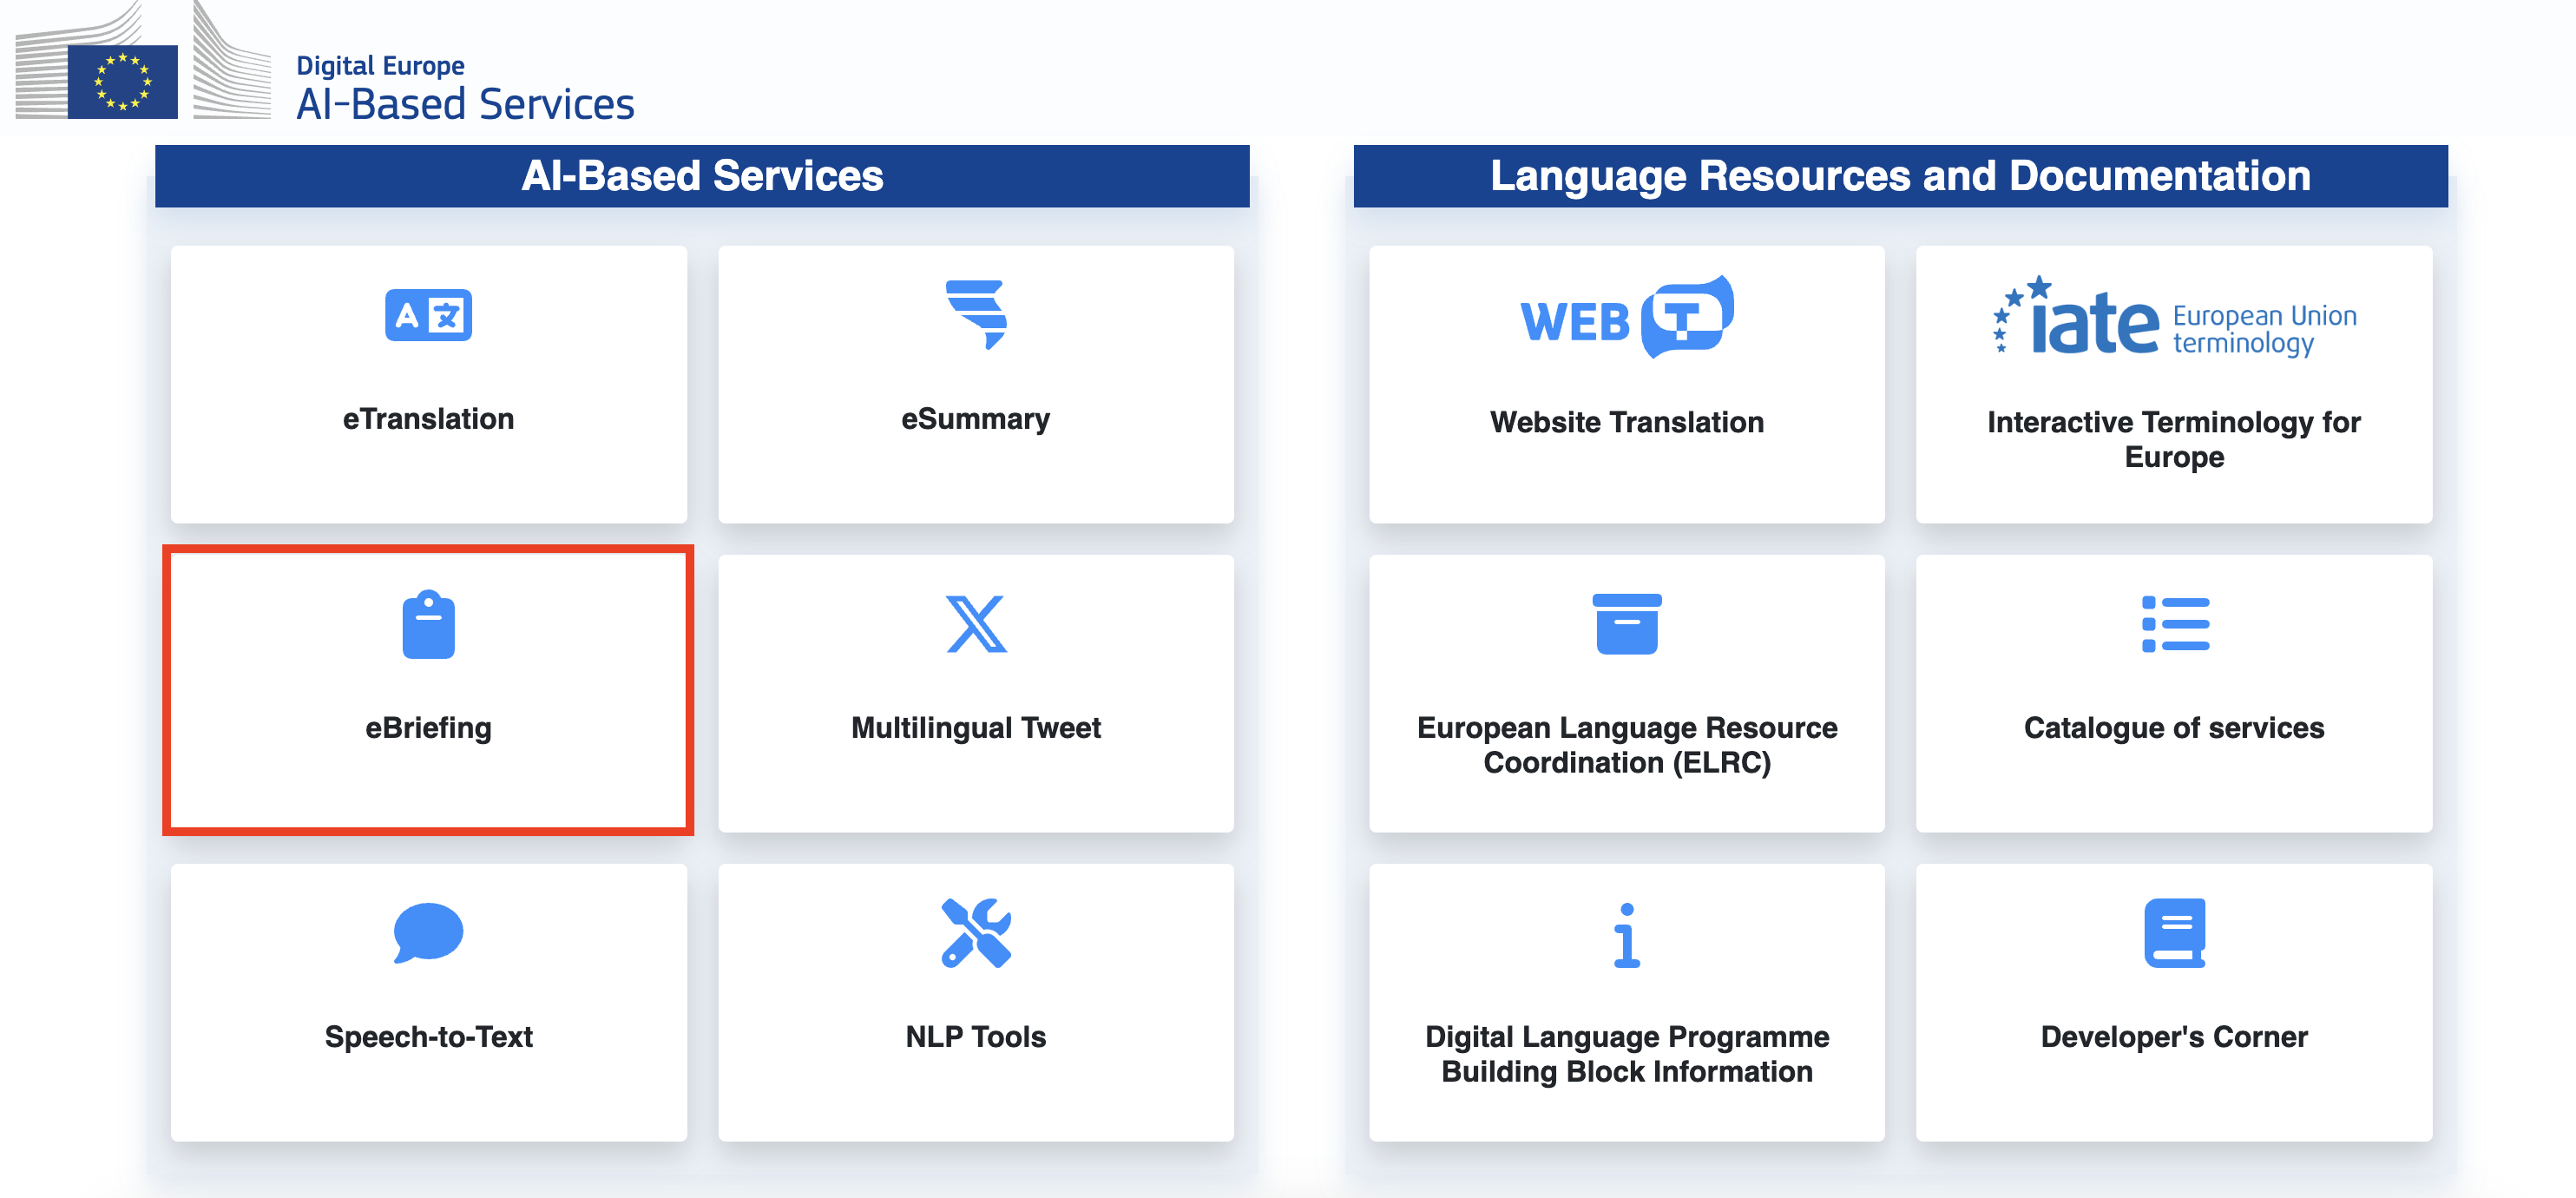

___

### eBriefing
- **Erstellt basierend auf bis zu zehn Dokumenten ein Briefing in einem von drei vorgegebenen Formaten**
- Zusätzlich **Angabe eines Themas** möglich (Hier der inhaltliche Vergleich der Gesetzestexte)
- **Format**: EU-Briefing
  - Hauptnachrichten
  - Fragen & Antworten
  - Hintergrund
- **Beispiel**: Inhaltlicher Vergleich des Entwurfes und der finalen Fassung der Gesetzestextes
- **Anmerkung**: Identifikation von Unterschieden, aber inkonsistente Zuordnung der Information zum korrekten Text (Entwurf und finale Version vertauscht)

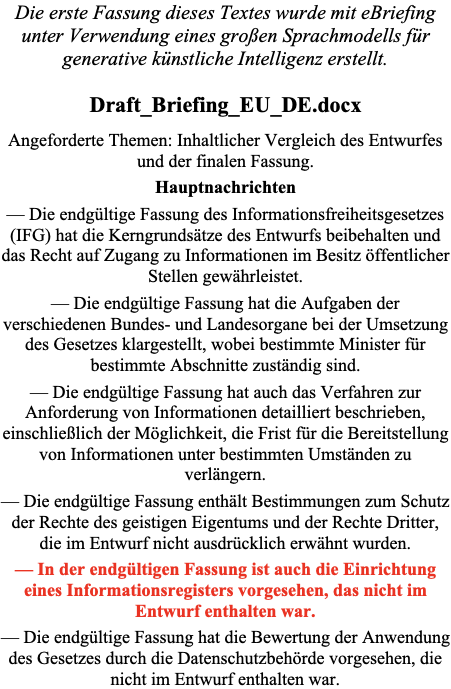

## **Digitaler Humanismus**



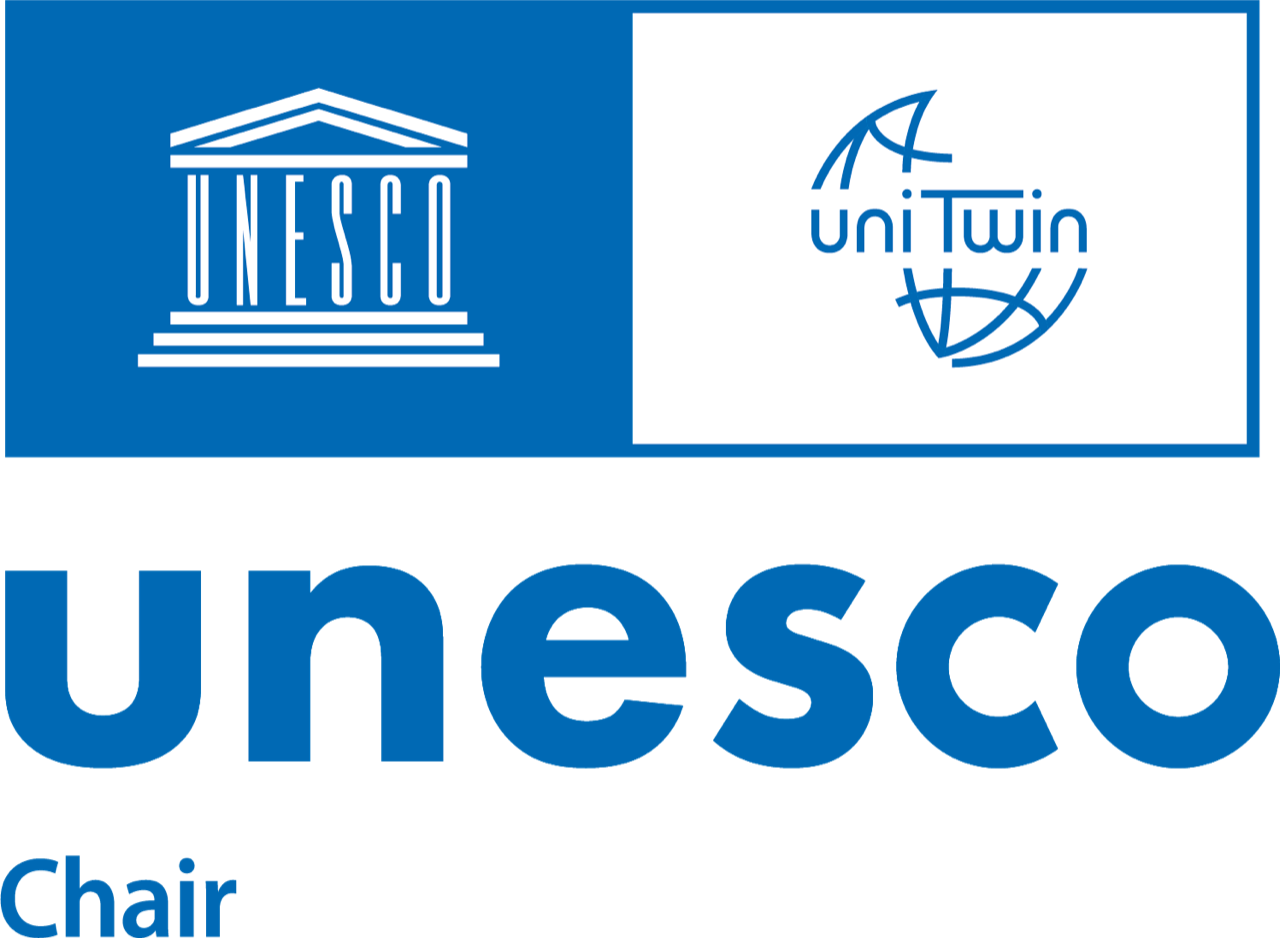

Wir beschäftigen uns an der TU unter anderem mit dieser Problematik, aber auch mit generellen Implikationen der Technologien auf die Öffentlichkeit und die Gesellschaft. Peter Knees and Julia Neidhardt (Direktorin CD Labor-RecSys) sind Chair and Co-Chair für den Digitalen Humanismus.

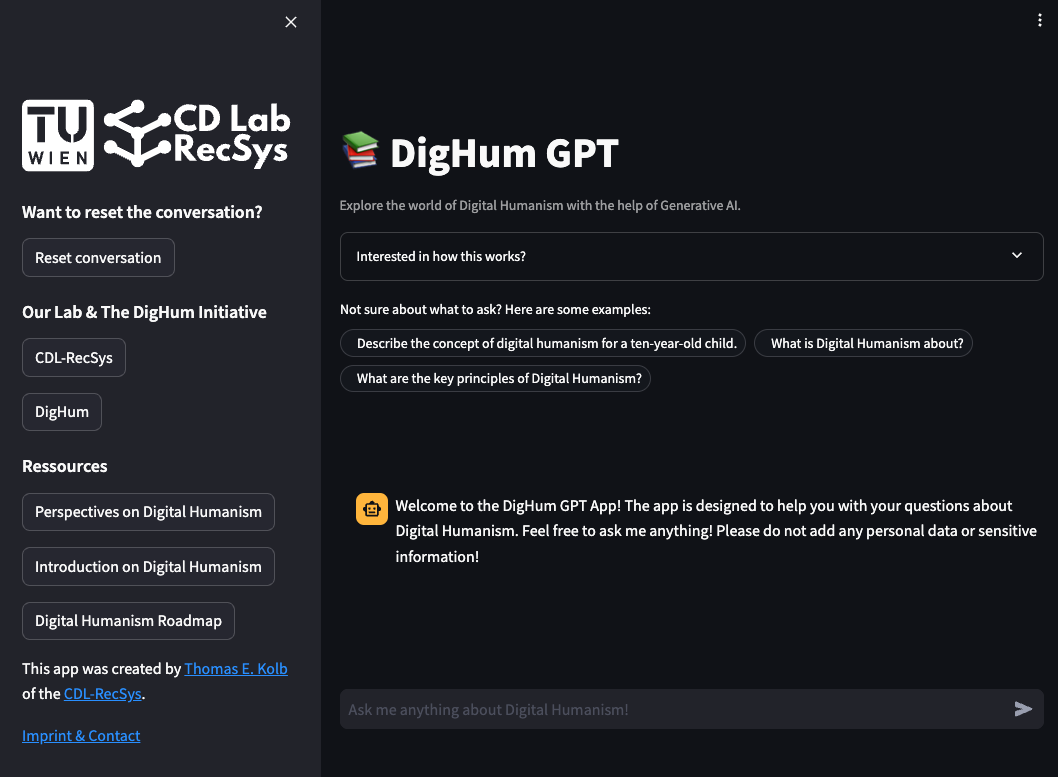

Link zur App: https://dighum.recsys-lab.at/

___
## **Wrap Up**

- Einblick in Sprachmodelle
- Beispiel Anhang des IFG
- Chancen & Risiken
- Beispiele für verfügbare Services